# Class Project

### Phyllis Kho

In [3]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import os
from scipy.stats import pearsonr
import calendar
import warnings
warnings.filterwarnings('ignore')
import glob
import zipfile

In [105]:
# OPEN ALL EN DATA IN ONE XARRAY

# Path to the directory containing the ZIP files
#directory_path = '/home/pyk2106/pyk2106/ENData/'

# Pattern matching the ZIP files (e.g., 'EN.4.2.2.analyses.c14.*.zip')
#zip_file_pattern = 'EN.4.2.2.analyses.c14.*.zip'

# Get a list of all matching ZIP files
#zip_files = glob.glob(f'{directory_path}{zip_file_pattern}')

# Create a directory to extract the netCDF files
#extraction_dir = 'extracted_files'
#os.makedirs(extraction_dir, exist_ok=True)

# Extract each netCDF file from the ZIP archives
#for zip_file in zip_files:
   # with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        #zip_ref.extractall(extraction_dir)

# Open all extracted netCDF files using xarray's open_mfdataset
#EN = xr.open_mfdataset(f'{extraction_dir}/*.nc', engine='netcdf4', combine='by_coords')

In [6]:
#EN = xr.open_mfdataset('/home/pyk2106/pyk2106/ENData/extracted_files/EN.4.2.2.f.analysis.c14.*.nc')
#EN = xr.open_mfdataset('/home/pyk2106/pyk2106/ENData/extracted_files/EN.4.2.2.f.analysis.c14.*.nc', concat_dim='time', combine='nested', data_vars='minimal', coords='minimal', compat='override')
EN = xr.open_mfdataset('/data9/GR6901/work/gus/PhyllisData/64bitoffs/ocean/EN.4.2.2.f.analysis.c14.*.nc', concat_dim='time', combine='nested', data_vars='minimal', coords='minimal', compat='override', drop_variables=['temperature','temperature_uncertainty','salinity_uncertainty','temperature_observation_weights','salinity_observation_weights','time_bnds','depth_bnds'])


In [7]:
EN

<xarray.Dataset>
Dimensions:   (depth: 42, lat: 173, lon: 360, time: 539)
Coordinates:
  * depth     (depth) float32 5.022 15.08 25.16 ... 4.752e+03 5.051e+03 5.35e+03
  * lat       (lat) float32 -83.0 -82.0 -81.0 -80.0 ... 86.0 87.0 88.0 89.0
  * lon       (lon) float32 1.0 2.0 3.0 4.0 5.0 ... 357.0 358.0 359.0 360.0
  * time      (time) datetime64[ns] 1979-01-16T12:00:00 ... 2023-12-16T12:00:00
Data variables:
    salinity  (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
Attributes: (12/22)
    Conventions:            CF-1.0
    title:                  Temperature and salinity analysis
    DSD_entry_id:           UKMO-L4UHFnd-GLOB-v01
    references:             Website and paper: https://www.metoffice.gov.uk/h...
    institution:            UK Met Office
    contact:                Rachel Killick - rachel.killick@metoffice.gov.uk
    ...                     ...
    southernmost_latitude:  -90.5
    northernmost_latitude:  89.5
    westernmost_longitude:  0.5
    easternmost_longitude:  362.5
    file_quality_index:     0
    licence:                EN4 is distributed under the Non Commercial Gover...

In [10]:

# Slice salinity, depth, lat and lon in EN data to get only SSS data in Florida
#SSS = EN.salinity.sel(lat=slice(20, 35), lon=slice(270, 290), time=slice('2010-01-01', '2023-12-31')).isel(depth=0)
SSS = EN.salinity.sel(depth=slice(0,6), lat=slice(20, 35), lon=slice(270, 290), time=slice('2013-01-01', '2023-12-31'))


In [11]:
SSS

<xarray.DataArray 'salinity' (time: 132, depth: 1, lat: 16, lon: 21)>
dask.array<getitem, shape=(132, 1, 16, 21), dtype=float32, chunksize=(1, 1, 16, 21), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 5.022
  * lat      (lat) float32 20.0 21.0 22.0 23.0 24.0 ... 31.0 32.0 33.0 34.0 35.0
  * lon      (lon) float32 270.0 271.0 272.0 273.0 ... 287.0 288.0 289.0 290.0
  * time     (time) datetime64[ns] 2013-01-16T12:00:00 ... 2023-12-16T12:00:00
Attributes:
    long_name:      salinity
    units:          1
    standard_name:  sea_water_salinity
    valid_min:      -5.0
    valid_max:      48.0

In [12]:
# Remove the depth dimension from SSS because there is only one value
SSS=SSS.squeeze(dim='depth')

In [13]:
SSS

<xarray.DataArray 'salinity' (time: 132, lat: 16, lon: 21)>
dask.array<getitem, shape=(132, 16, 21), dtype=float32, chunksize=(1, 16, 21), chunktype=numpy.ndarray>
Coordinates:
    depth    float32 5.022
  * lat      (lat) float32 20.0 21.0 22.0 23.0 24.0 ... 31.0 32.0 33.0 34.0 35.0
  * lon      (lon) float32 270.0 271.0 272.0 273.0 ... 287.0 288.0 289.0 290.0
  * time     (time) datetime64[ns] 2013-01-16T12:00:00 ... 2023-12-16T12:00:00
Attributes:
    long_name:      salinity
    units:          1
    standard_name:  sea_water_salinity
    valid_min:      -5.0
    valid_max:      48.0

In [53]:
#SSS=SSS.drop_vars("depth")

In [54]:
SSS

<xarray.DataArray 'salinity' (time: 132, lat: 16, lon: 21)>
dask.array<getitem, shape=(132, 16, 21), dtype=float32, chunksize=(1, 16, 21), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 20.0 21.0 22.0 23.0 24.0 ... 31.0 32.0 33.0 34.0 35.0
  * lon      (lon) float32 270.0 271.0 272.0 273.0 ... 287.0 288.0 289.0 290.0
  * time     (time) datetime64[ns] 2013-01-16T12:00:00 ... 2023-12-16T12:00:00
Attributes:
    long_name:      salinity
    units:          1
    standard_name:  sea_water_salinity
    valid_min:      -5.0
    valid_max:      48.0

In [15]:
# Open precipitation data
precip_download = '/home/pyk2106/precip.mon.mean.nc'
precip_ds = xr.open_dataset(precip_download)


# Slide precipitation data for Florida
precip = precip_ds.precip.sel(lat=slice(20, 35), lon=slice(270, 290), time=slice('2013-01-01', '2023-12-31'))

In [56]:
precip

<xarray.DataArray 'precip' (time: 132, lat: 6, lon: 8)>
[6336 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 21.25 23.75 26.25 28.75 31.25 33.75
  * lon      (lon) float32 271.2 273.8 276.2 278.8 281.2 283.8 286.2 288.8
  * time     (time) datetime64[ns] 2013-01-01 2013-02-01 ... 2023-12-01
Attributes:
    long_name:     Average Monthly Rate of Precipitation
    valid_range:   [  0. 100.]
    units:         mm/day
    precision:     32767
    var_desc:      Precipitation
    dataset:       GPCP Version 2.3 Combined Precipitation Dataset
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Mean
    actual_range:  [0.0000000e+00 1.5581504e+23]

In [16]:
# Calculate average precipitation and SSS over space
precip_clim = precip.mean(dim=('lat', 'lon'))
SSS_clim = SSS.mean(dim=('lat', 'lon'))

In [17]:
SSS_clim

<xarray.DataArray 'salinity' (time: 132)>
dask.array<mean_agg-aggregate, shape=(132,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    depth    float32 5.022
  * time     (time) datetime64[ns] 2013-01-16T12:00:00 ... 2023-12-16T12:00:00

In [59]:
precip_clim

<xarray.DataArray 'precip' (time: 132)>
array([1.641981 , 3.5058365, 2.153951 , 4.066542 , 3.2264023, 5.046732 ,
       5.33618  , 3.893693 , 3.7152367, 2.6923625, 3.3674717, 2.292113 ,
       3.1736825, 2.9802   , 3.4562428, 3.2360725, 2.9194539, 3.1400003,
       3.50332  , 4.2814918, 4.607161 , 3.583936 , 3.272504 , 1.9099437,
       2.2329128, 3.1042292, 1.9495496, 3.1150148, 2.6558688, 3.4949982,
       3.296301 , 4.0920496, 4.610258 , 4.4436574, 3.8145354, 3.8707597,
       4.425876 , 2.881993 , 2.6098404, 2.1088169, 3.5061677, 3.9080913,
       2.49113  , 4.369213 , 4.461617 , 3.5943477, 1.3469176, 2.0957003,
       3.0840976, 2.067613 , 1.7596647, 2.3109856, 3.3644917, 5.49315  ,
       3.44796  , 4.530639 , 6.1793256, 4.4574037, 2.5351481, 1.9475349,
       3.4597273, 1.810193 , 1.946196 , 2.9547653, 5.290458 , 2.8746622,
       4.3316455, 2.9677553, 3.2352664, 2.343094 , 2.9816043, 3.811839 ,
       3.023285 , 2.7771692, 1.8775314, 3.1142638, 2.2159584, 3.458683 ,
       3.6675844, 4.505919 , 3.98541  , 3.798788 , 1.9876767, 3.147294 ,
       2.1025808, 3.0771267, 1.5768771, 2.9448855, 4.5065475, 4.16732  ,
       3.8614788, 4.2953467, 4.978036 , 5.198935 , 3.662842 , 2.4139364,
       2.0970092, 3.1745112, 2.309289 , 2.6989336, 2.2192936, 4.9926066,
       3.938296 , 4.668424 , 3.9177868, 3.6610146, 3.2128618, 1.9134852,
       2.355779 , 2.1900332, 2.6746073, 2.4383519, 3.3213673, 4.198933 ,
       3.0039673, 3.6850698, 4.9496245, 2.7941647, 2.9822996, 2.5691957,
       2.2062206, 1.8494024, 1.997909 , 3.3684285, 3.3316333, 4.975837 ,
       3.2307205, 3.9642975, 4.2676144, 2.9990623, 3.8088486, 4.426228 ],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 2013-02-01 ... 2023-12-01

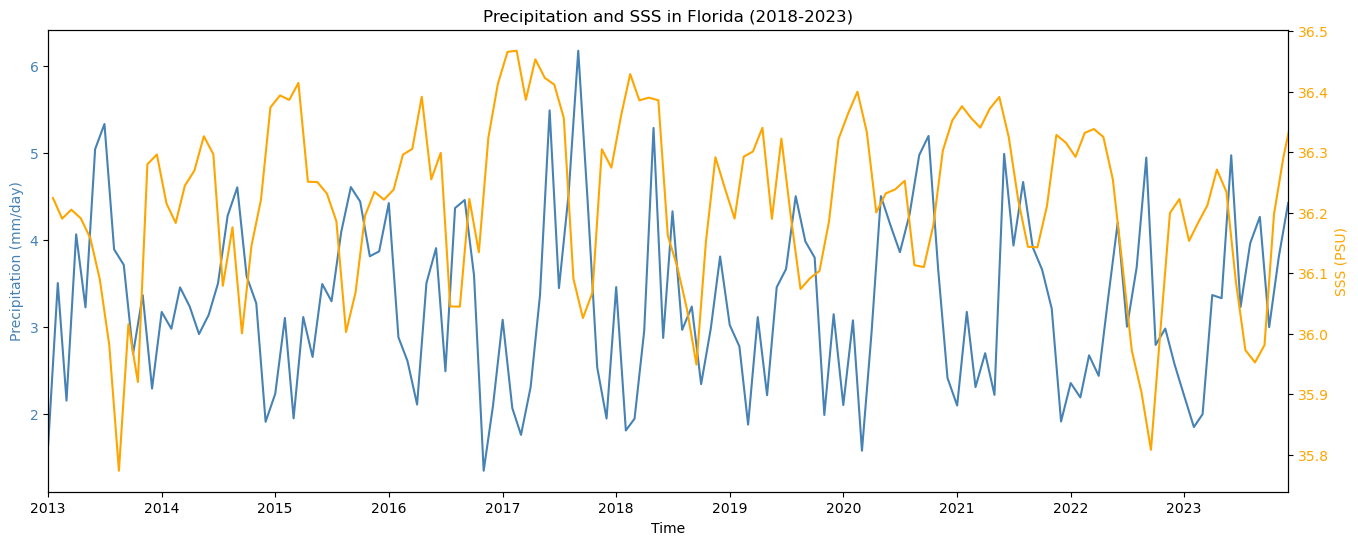

In [18]:
# Create a new figure and axis sharing the same x-axis
fig, ax1 = plt.subplots(figsize=(16, 6))

# Plot precipitation on the primary y-axis
ax1.plot(precip_clim.time, precip_clim, color='steelblue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Precipitation (mm/day)', color='steelblue')

ax1.set_title('Precipitation and SSS in Florida (2018-2023)')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xlim(precip_clim.time.min(), precip_clim.time.max())

# Create a secondary y-axis for SSS
ax2 = ax1.twinx()
ax2.plot(SSS_clim.time, SSS_clim, color='orange')
ax2.set_ylabel('SSS (PSU)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

In [19]:
# Calculate standard deviation and mean of precipitation and SSS over each month
precip_sd = precip_clim.groupby('time.month').std()
precip_mean = precip_clim.groupby('time.month').mean()

SSS_sd = SSS_clim.groupby('time.month').std()
SSS_mean = SSS_clim.groupby('time.month').mean()

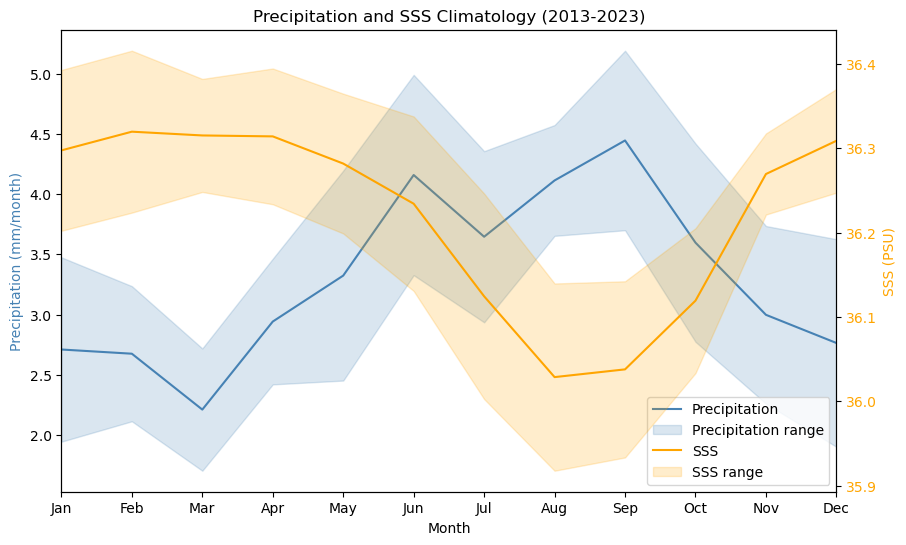

In [20]:
 # Create a new figure and axis sharing the same x-axis
fig, ax1 = plt.subplots(figsize=(10, 6));
    
# Define the x-axis values (months) and use abbreviations for each month
months = range(1, 13);
month_names = [calendar.month_abbr[m] for m in months] ;
    
# Plot precipitation on the primary y-axis
#ax1.errorbar(months, precip_mean, yerr=precip_sd, capsize=3, ecolor='grey', color='steelblue', label='Precipitation');
ax1.plot(months, precip_mean, linestyle='-', color='steelblue', label ="Precipitation");
ax1.fill_between(months, precip_mean+precip_sd, precip_mean-precip_sd, color='steelblue', alpha=0.2, label ="Precipitation range");
ax1.set_xlabel('Month');
ax1.set_xlim(months[0], months[-1]);
ax1.set_xticks(months);
ax1.set_xticklabels(month_names); 
ax1.set_ylabel('Precipitation (mm/month)', color='steelblue');
ax1.tick_params(axis='y');
ax1.set_title('Precipitation and SSS Climatology (2013-2023)');

    
# Create a secondary y-axis for SSS
ax2 = ax1.twinx();
#ax2.errorbar(months, SSS_mean, yerr=SSS_sd, capsize=3, ecolor='black', color='orange', label='SSS')
ax2.plot(months, SSS_mean, linestyle='-', color='orange', label = "SSS");
ax2.fill_between(months, SSS_mean+SSS_sd, SSS_mean-SSS_sd, color='orange', alpha=0.2, label = "SSS range");
ax2.set_ylabel('SSS (PSU)', color='orange');
ax2.tick_params(axis='y', labelcolor='orange');


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='lower right')

In [21]:
# Convert DataArrays to numpy arrays for correlation calculation
#SSS_array = SSS_clim.values
#precip_array = precip_clim.values
# GC 20240419 - Using the code above, the singleton dimensions of SSS and precip cause polyfit below to fail.  

# np.squeeze removes single-dimensional entries from the shape of an array
SSS_array = np.squeeze(SSS_clim.values)
precip_array = np.squeeze(precip_clim.values)

In [22]:
# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(SSS_array, precip_array)

# Calculate linear regression parameters
slope, intercept = np.polyfit(SSS_array, precip_array, 1)

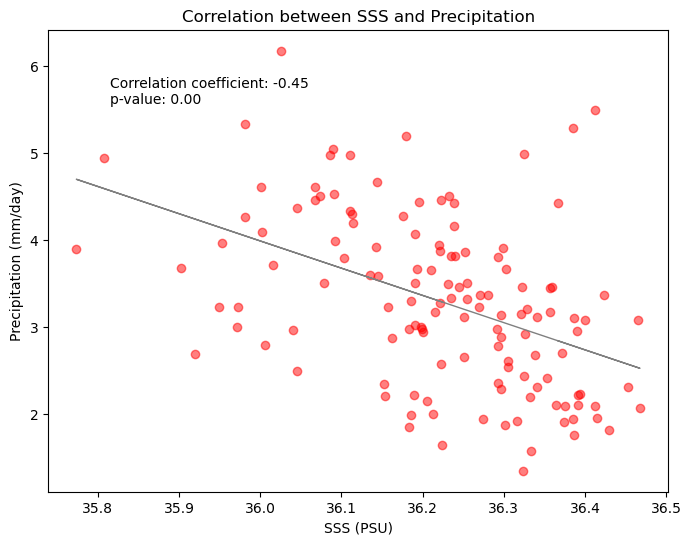

In [23]:
# Create scatter plot
plt.figure(figsize=(8, 6));
plt.scatter(SSS_array, precip_array, color='red', alpha=0.5, label='Data');

# Plot best-fit line
plt.plot(SSS_array, slope * SSS_array + intercept, color='grey', linewidth=1, linestyle='solid');

# Add labels and title
plt.xlabel('SSS (PSU)');
plt.ylabel('Precipitation (mm/day)');
plt.title('Correlation between SSS and Precipitation');

# Add correlation coefficient and p-value to plot
plt.text(0.1, 0.9, f'Correlation coefficient: {correlation_coefficient:.2f}\np-value: {p_value:.2f}',
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top');

In [21]:
correlation_coefficient, p_value

(-0.4307969119205707, 5.57727910853225e-09)

In [22]:
slope, intercept

(-2.7428821456299577, 102.51391938149128)

In [23]:
slope * SSS_array + intercept

array([3.267929 , 3.3455658, 4.4439697, 3.878746 , 3.572441 , 3.179985 ,
       3.6702118, 3.8840408, 3.8604202, 3.6375046, 2.9309921, 2.7198868,
       2.819168 , 3.0386887, 3.2268906, 3.2745438, 3.3419876, 3.867569 ,
       4.8895264, 4.8385086, 4.5560684, 4.070076 , 3.8087006, 3.2024612,
       3.203926 , 3.1558075, 3.3249435, 3.0729752, 3.421898 , 3.8335648,
       4.054619 , 4.128807 , 3.8047485, 3.7202759, 3.344864 , 3.1093903,
       3.1551743, 3.2486572, 3.2081223, 3.2473679, 3.3370895, 3.523285 ,
       3.82238  , 4.3910446, 3.7270432, 3.9891205, 3.0025558, 2.9581451,
       3.1803436, 3.2682114, 3.0990295, 3.0314713, 2.875412 , 2.9569397,
       3.5532303, 3.2881622, 3.7684479, 3.3721848, 3.163643 , 2.7445068,
       2.6904373, 2.7107162, 2.6337433, 3.081398 , 3.0831604, 3.1351395,
       3.2607422, 3.7625885, 3.5844193, 3.2355118, 3.1272888, 3.1627731,
       3.1173096, 2.9587479, 2.9325256, 2.6967392, 3.0707397, 2.9506912,
       3.646782 , 3.647522 , 3.15979  , 3.400978 , 